## Assignment-1: Neural Networks

## Esha Reddy Emani


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
imdb = keras.datasets.imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


## Decoding

In [5]:
word_index=imdb.get_word_index()
reverse_word_index=dict(
                    [(value,key) for (key,value) in word_index.items()])
decoded_review = "".join(
    [reverse_word_index.get(i-3,"?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        for j in sequence:
            results[i,j]=1.
    return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train=np.asarray(train_labels).astype("float32")
y_test=np.asarray(test_labels).astype("float32")

## Building the Model

In [9]:
model=keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation="sigmoid")
])

In [10]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])


## Training the Model

In [11]:
#creating validation set
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]


In [12]:
history= model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 186ms/step - accuracy: 0.7042 - loss: 0.6048 - val_accuracy: 0.8644 - val_loss: 0.3690
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8996 - loss: 0.2940 - val_accuracy: 0.8883 - val_loss: 0.2855
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9419 - loss: 0.1888 - val_accuracy: 0.8891 - val_loss: 0.2784
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9601 - loss: 0.1356 - val_accuracy: 0.8855 - val_loss: 0.2907
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9756 - loss: 0.0977 - val_accuracy: 0.8808 - val_loss: 0.3122
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9850 - loss: 0.0729 - val_accuracy: 0.8777 - val_loss: 0.3396
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9917 - loss: 0.0546 - val_accuracy: 0.8761 - val_loss: 0.3700
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9950 - loss: 0.0385 - val_accuracy: 0.8746 - 

In [13]:
history_dict=history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## Plotting of Accuracy and Loss

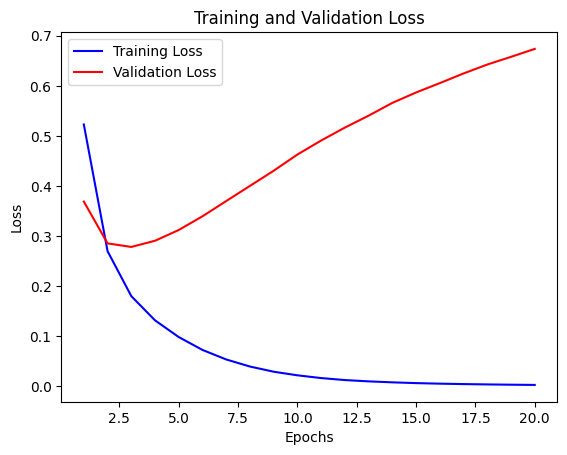

In [14]:
# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

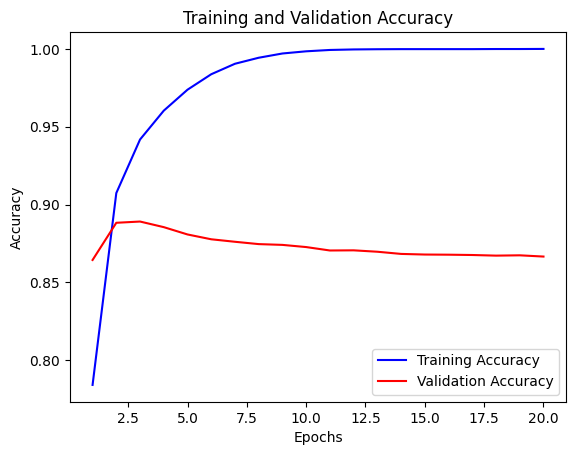

In [15]:
# Extract loss values from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create an array of epoch numbers
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Evaluating the Model

In [16]:
results=model.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8534 - loss: 0.7412


In [17]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[4.2514568e-03],
       [9.9999964e-01],
       [7.2621208e-01],
       ...,
       [4.1807053e-04],
       [3.4485923e-03],
       [9.4986463e-01]], dtype=float32)

## 1.You used two hidden layers. Try using one or three hidden layers and see how doing so affects validation and test accuracy.

In [18]:
model2=keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation="sigmoid")
])

In [19]:
model2.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])
history2= model2.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.6700 - loss: 0.6229 - val_accuracy: 0.8657 - val_loss: 0.3852
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9094 - loss: 0.2950 - val_accuracy: 0.8849 - val_loss: 0.2909
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9438 - loss: 0.1789 - val_accuracy: 0.8883 - val_loss: 0.2844
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9677 - loss: 0.1164 - val_accuracy: 0.8811 - val_loss: 0.3136
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9781 - loss: 0.0882 - val_accuracy: 0.8770 - val_loss: 0.3545
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9881 - loss: 0.0606 - val_accuracy: 0.8774 - val_loss: 0.3836
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9932 - loss: 0.0415 - val_accuracy: 0.8751 - val_loss: 0.4247
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9969 - loss: 0.0304 - val_accuracy: 0.8750 - v

In [20]:
results=model2.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8530 - loss: 0.8785


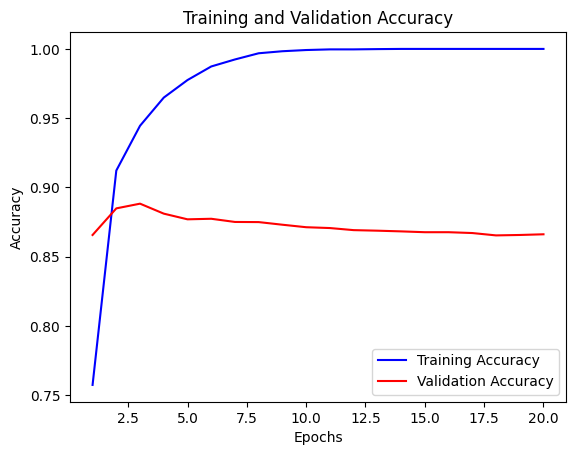

In [21]:
# Extract loss values from the training history
train_accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']

# Create an array of epoch numbers
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

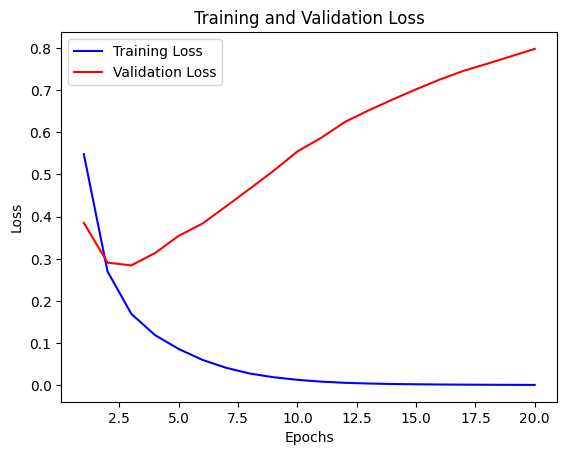

In [22]:

# Extract loss values from the training history
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Increasing hidden layer has made valiidation loss to increase from 0.6170 to 0.7099 and test loss decreased**

## 2. Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.

In [23]:
model3=keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation = "relu"),
    layers.Dense(1, activation="sigmoid")
])

In [24]:
model3.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])
history3= model3.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.7055 - loss: 0.6034 - val_accuracy: 0.8728 - val_loss: 0.3308
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9143 - loss: 0.2492 - val_accuracy: 0.8898 - val_loss: 0.2756
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9513 - loss: 0.1508 - val_accuracy: 0.8815 - val_loss: 0.2951
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9714 - loss: 0.1007 - val_accuracy: 0.8765 - val_loss: 0.3567
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9819 - loss: 0.0735 - val_accuracy: 0.8777 - val_loss: 0.3615
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9918 - loss: 0.0444 - val_accuracy: 0.8736 - val_loss: 0.4103
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9965 - loss: 0.0293 - val_accuracy: 0.8742 - val_loss: 0.4518
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9990 - loss: 0.0199 - val_accuracy: 0.8729 - 

In [25]:
results=model3.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8527 - loss: 0.8559


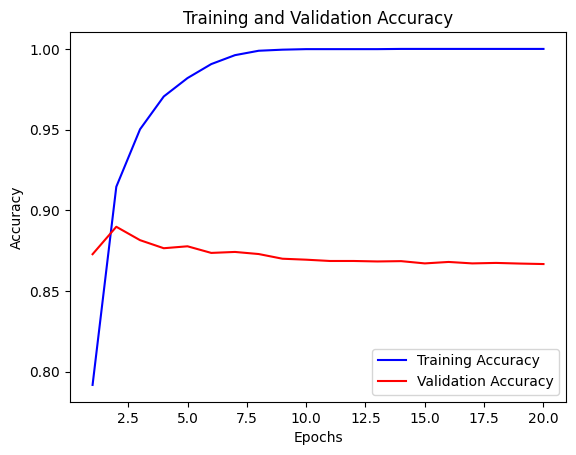

In [26]:
# Extract loss values from the training history
train_accuracy = history3.history['accuracy']
val_accuracy = history3.history['val_accuracy']

# Create an array of epoch numbers
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

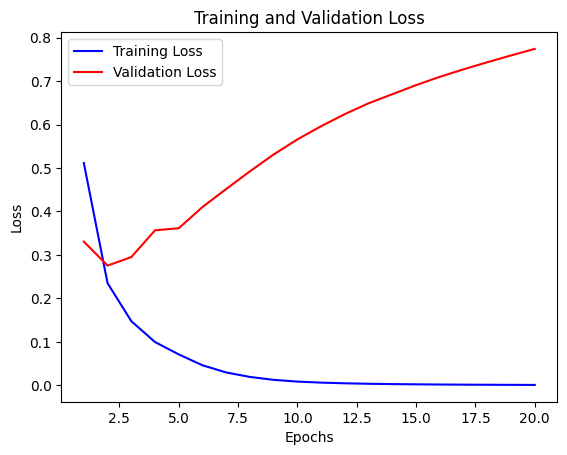

In [27]:

# Extract loss values from the training history
train_loss = history3.history['loss']
val_loss = history3.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**By increasing hidden units in the hidden layers from 16 to 32 makes val_loss to increase and test_loss to increase**

## 3. Try using the mse loss function instead of binary_crossentropy.

In [28]:
model.compile(optimizer="adam",
             loss="mse",
              metrics=["accuracy"])
history4= model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 1.0000 - loss: 1.0434e-04 - val_accuracy: 0.8609 - val_loss: 0.1194
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 1.8861e-04 - val_accuracy: 0.8620 - val_loss: 0.1203
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9998 - loss: 3.7334e-04 - val_accuracy: 0.8572 - val_loss: 0.1253
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9997 - loss: 5.2828e-04 - val_accuracy: 0.8555 - val_loss: 0.1263
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9996 - loss: 4.7911e-04 - val_accuracy: 0.8576 - val_loss: 0.1263
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9997 - loss: 4.9827e-04 - val_accuracy: 0.8577 - val_loss: 0.1257
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9998 - loss: 4.1551e-04 - val_accuracy: 0.8595 - val_loss: 0.1253
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 2.225

By changing the loss function from binary cross entropy to mse, the model has more val_loss and less val_accuracy

In [29]:
results=model.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8440 - loss: 0.1407


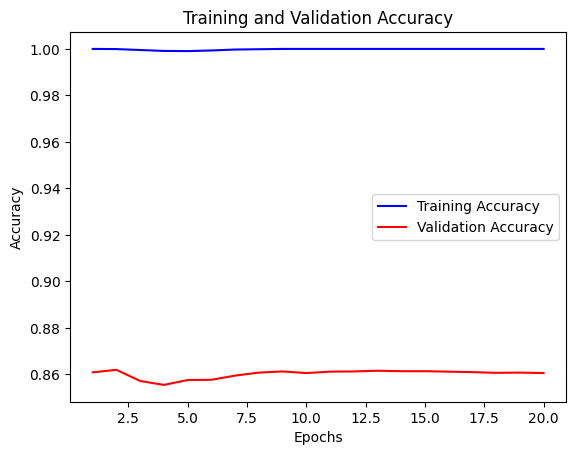

In [30]:
# Extract loss values from the training history
train_accuracy = history4.history['accuracy']
val_accuracy = history4.history['val_accuracy']

# Create an array of epoch numbers
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

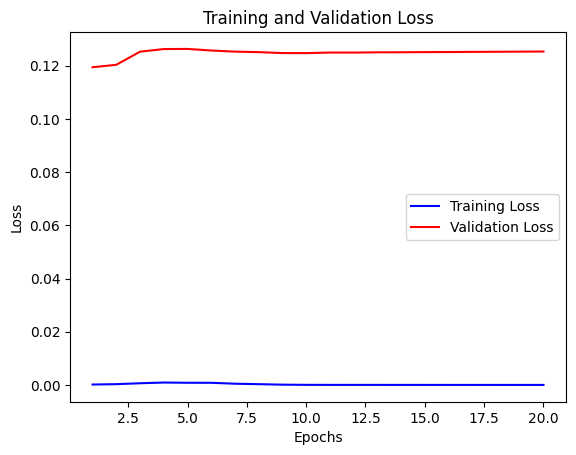

In [31]:

# Extract loss values from the training history
train_loss = history4.history['loss']
val_loss = history4.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 4. Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

In [32]:
model4=keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation = "tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [33]:
model4.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])
history4= model4.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.7269 - loss: 0.5903 - val_accuracy: 0.8616 - val_loss: 0.3799
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8987 - loss: 0.3075 - val_accuracy: 0.8865 - val_loss: 0.2924
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9357 - loss: 0.1978 - val_accuracy: 0.8873 - val_loss: 0.2755
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9575 - loss: 0.1453 - val_accuracy: 0.8858 - val_loss: 0.2813
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9778 - loss: 0.1016 - val_accuracy: 0.8814 - val_loss: 0.2980
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9857 - loss: 0.0743 - val_accuracy: 0.8794 - val_loss: 0.3188
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9887 - loss: 0.0604 - val_accuracy: 0.8757 - val_loss: 0.3449
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9953 - loss: 0.0420 - val_accuracy: 0.8741 - 

In [34]:
results=model4.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8528 - loss: 0.6457


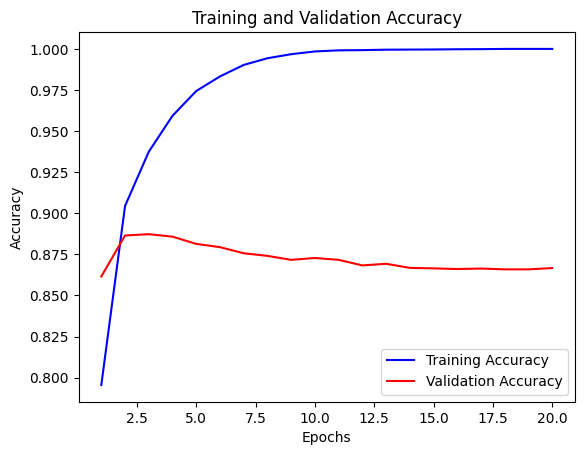

In [35]:
# Extract loss values from the training history
train_accuracy = history4.history['accuracy']
val_accuracy = history4.history['val_accuracy']

# Create an array of epoch numbers
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

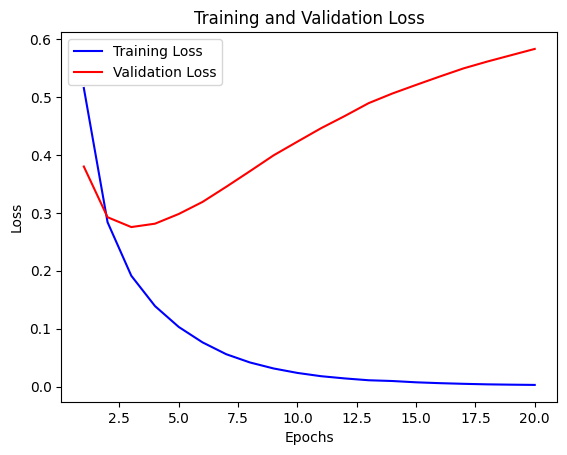

In [36]:

# Extract loss values from the training history
train_loss = history4.history['loss']
val_loss = history4.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**There is no change in accuracy but val_accuracy decreases, val_loss increases. Test accuracy and test loss slightly increases**

## 5. Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.

In [37]:
model5=keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(16, activation = "relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])

In [38]:
model5.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])
history5= model5.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.5568 - loss: 0.6723 - val_accuracy: 0.8022 - val_loss: 0.5193
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8008 - loss: 0.4860 - val_accuracy: 0.8786 - val_loss: 0.3675
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8823 - loss: 0.3506 - val_accuracy: 0.8888 - val_loss: 0.3070
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9166 - loss: 0.2711 - val_accuracy: 0.8866 - val_loss: 0.2952
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9388 - loss: 0.2130 - val_accuracy: 0.8867 - val_loss: 0.2881
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9494 - loss: 0.1790 - val_accuracy: 0.8864 - val_loss: 0.2904
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9616 - loss: 0.1384 - val_accuracy: 0.8834 - val_loss: 0.3133
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9697 - loss: 0.1136 - val_accuracy: 0.8849 - 

**In this case training accuracy remains same but validation accuracy increases, val_loss is still same.**

In [39]:
results=model5.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8601 - loss: 0.6466


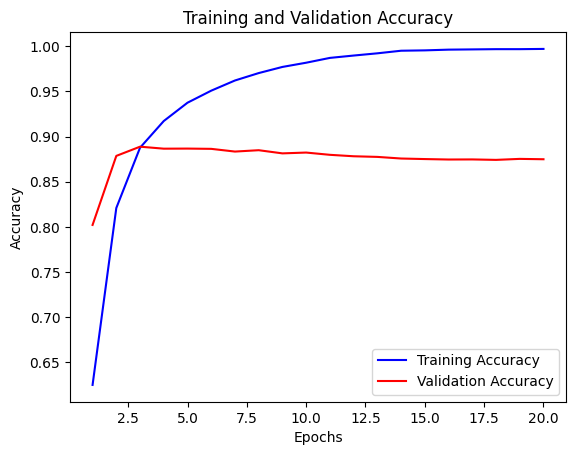

In [40]:
# Extract loss values from the training history
train_accuracy = history5.history['accuracy']
val_accuracy = history5.history['val_accuracy']

# Create an array of epoch numbers
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

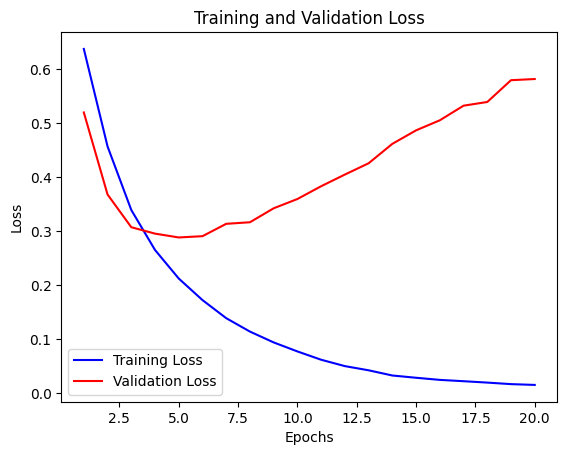

In [41]:

# Extract loss values from the training history
train_loss = history5.history['loss']
val_loss = history5.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**test_accuracy also increases**